In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/HP/Documents/streamlit/datasets/Electronic.csv')
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0,Morning


In [3]:
df.shape

(5000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                5000 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        5000 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          5000 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     5000 non-null   int64  
 14  Preferred Visit Time  5000 non-null   object 
dtypes: float64(6), int64(

In [5]:
df.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975049,15.638275,0.308400
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250683,9.144742,0.461879
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799401,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969629,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149890,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235392,1.000000


In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop(['Warranty Extension','Membership Status'],axis=1)
cv = (numeric_df.std() / numeric_df.mean())
print("Coefficient of Varaince  per column:\n", cv)

Coefficient of Varaince  per column:
 Age                   0.342302
Items Purchased       0.532715
Total Spent           0.635762
Discount (%)          0.510351
Satisfaction Score    0.578616
Revenue               1.081882
Store Rating          0.063064
Loyalty Score         0.584767
dtype: float64


In [7]:
df.describe(include=object)

,Gender,Region,Product Category,Payment Method,Preferred Visit Time
count,5000,5000,5000,5000,5000
unique,3,4,5,5,3
top,Male,South,Accessories,Net Banking,Morning
freq,2447,1310,1015,1039,1677


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Age                     0
Items Purchased         0
Total Spent             0
Discount (%)            0
Satisfaction Score      0
Warranty Extension      0
Gender                  0
Region                  0
Product Category        0
Payment Method          0
Revenue                 0
Store Rating            0
Loyalty Score           0
Membership Status       0
Preferred Visit Time    0
dtype: int64

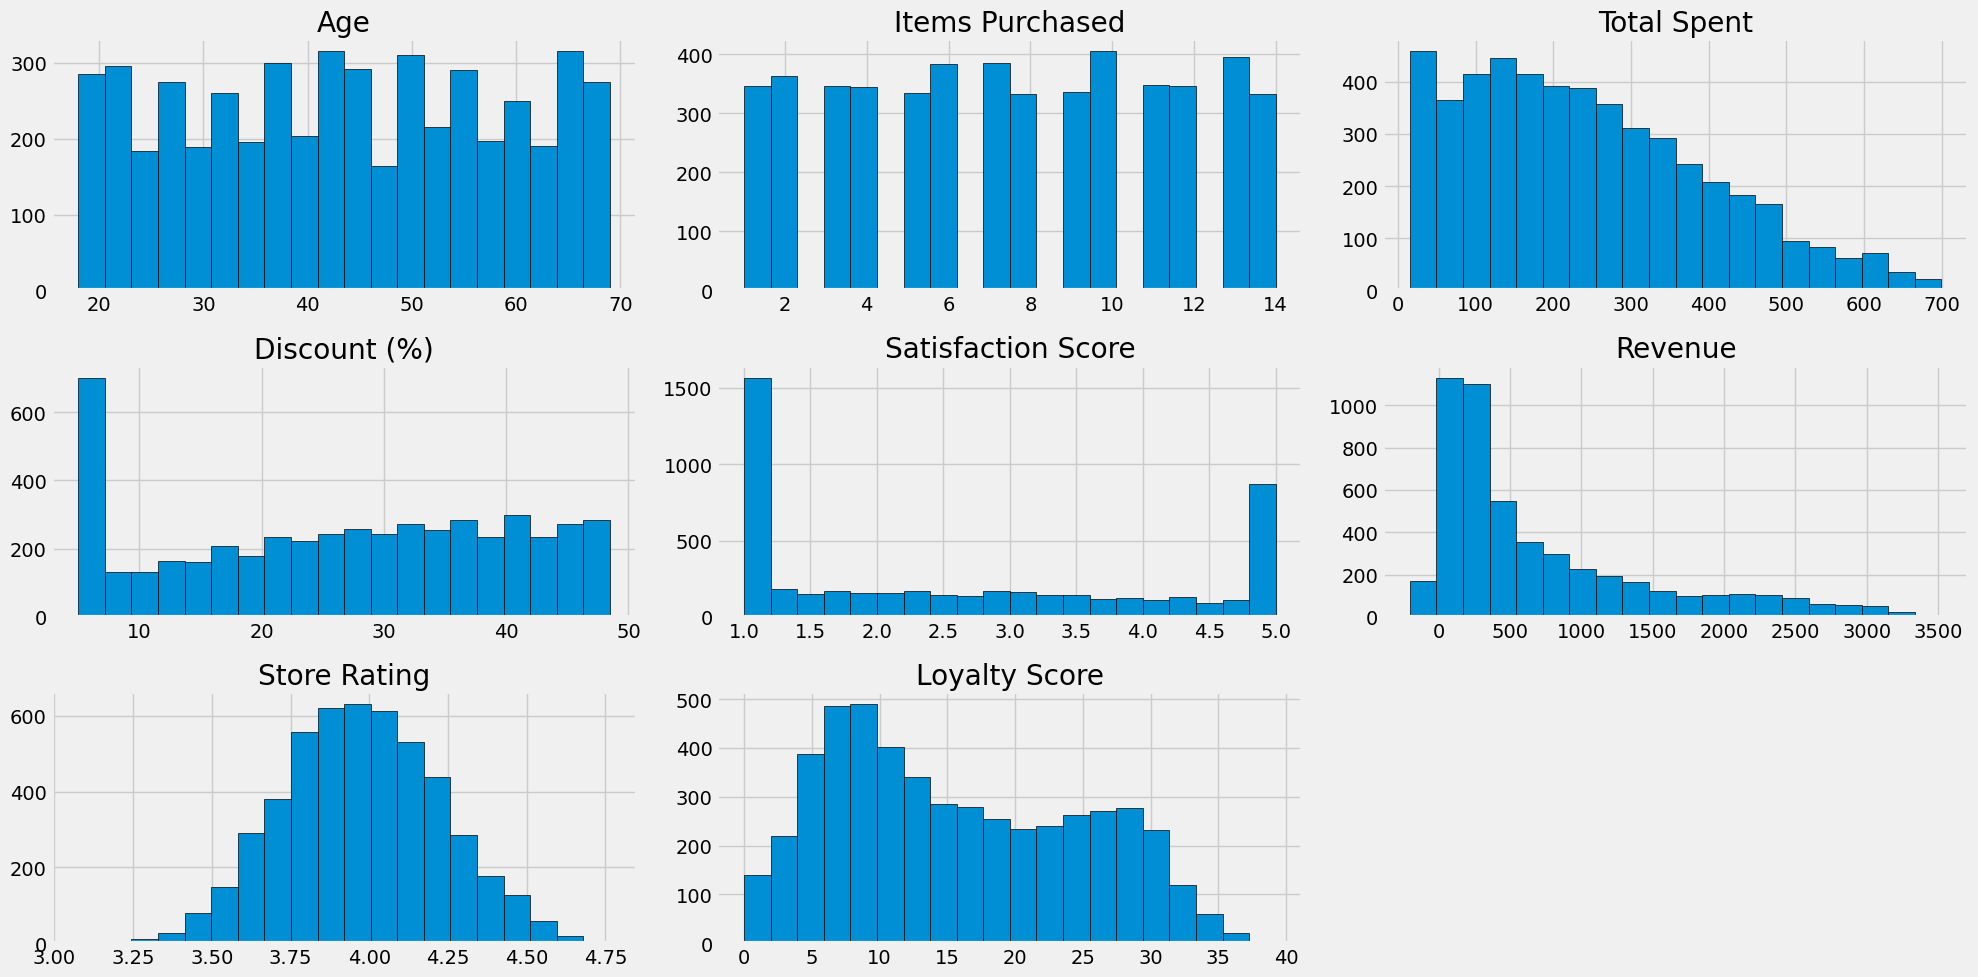

In [10]:
#Created histogram for checking distribution for all numeric columns
numeric_df.hist(figsize=(20, 10), bins=20, edgecolor="black")
plt.tight_layout()
plt.show()

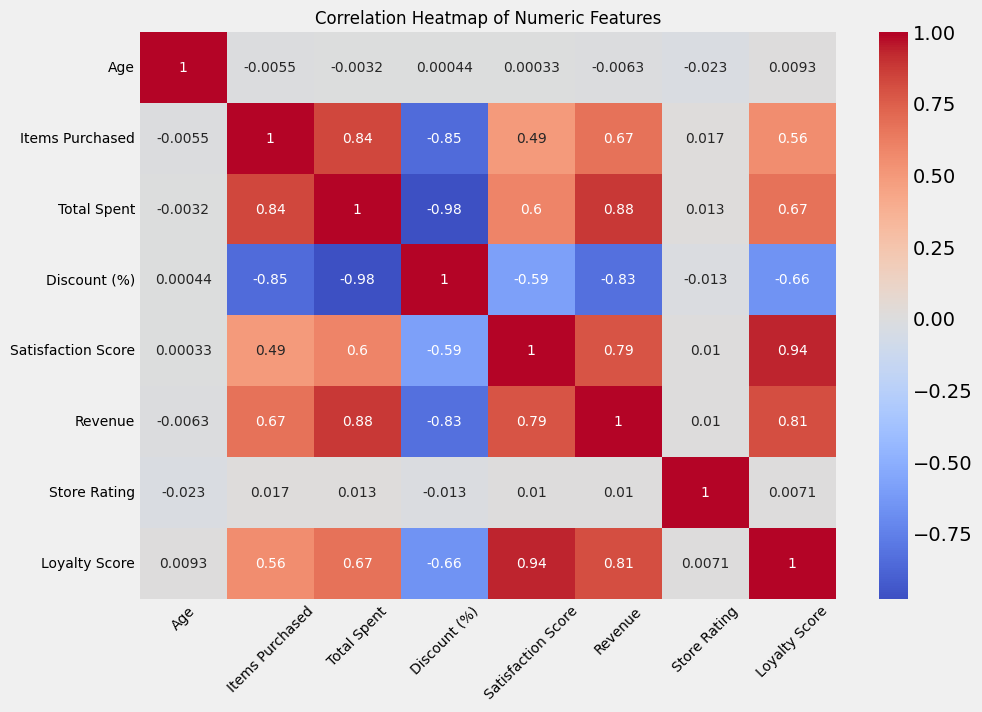

In [11]:
# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0,annot_kws={"fontsize": 10})
plt.title("Correlation Heatmap of Numeric Features",fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

In [12]:
df.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Gender', 'Region',
       'Product Category', 'Payment Method', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status', 'Preferred Visit Time'],
      dtype='object')

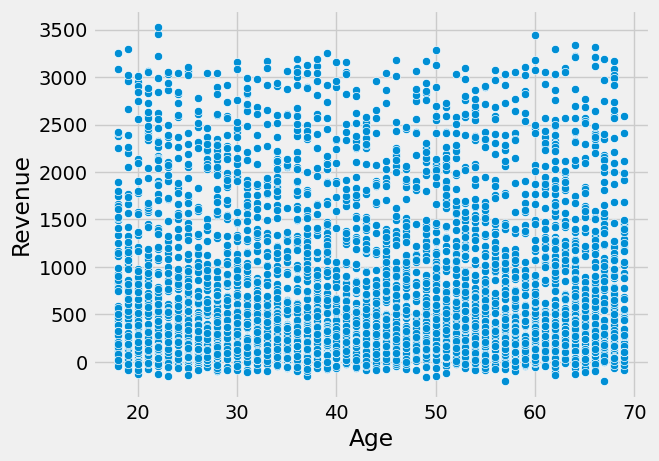

In [13]:
sns.scatterplot(df, x='Age', y='Revenue')
plt.show()

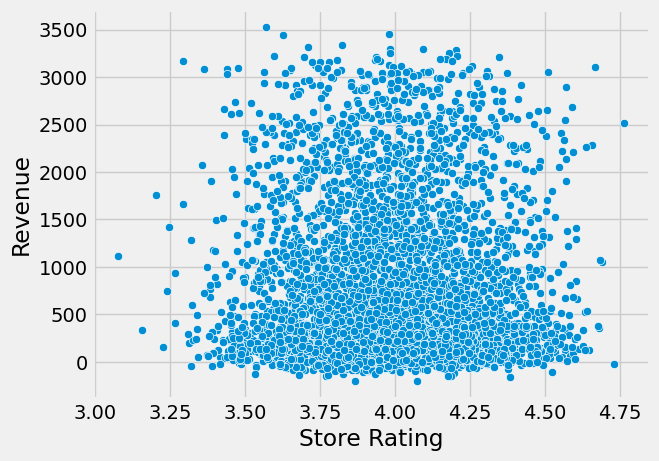

In [14]:
sns.scatterplot(df, x='Store Rating', y='Revenue')
plt.show()

In [15]:
import statsmodels.api as sm 

X = df[['Age','Store Rating']]
y = df['Revenue']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3680
Date:                Fri, 09 Jan 2026   Prob (F-statistic):              0.692
Time:                        00:11:16   Log-Likelihood:                -40370.
No. Observations:                5000   AIC:                         8.075e+04
Df Residuals:                    4997   BIC:                         8.076e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          604.3966    178.265      3.390      0.001     254.918     953.875
Age             -0.3181      0.737     -0.432      0.666      -1.762       1.126
Store Rating    32.0666     43.843      0.731      0.465     -53.885     118.019
==============================================================================
Omnibus:                     1058.935   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1862.785
Skew:                           1.394   Prob(JB):                         0.00
Kurtosis:                       4.083   Cond. No.                         772.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df = df.drop(['Age','Store Rating'],axis=1)
df

,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Loyalty Score,Membership Status,Preferred Visit Time
0,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.597133,1,Evening
1,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,25.764903,1,Evening
2,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,7.022399,1,Morning
3,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,7.635412,1,Afternoon
4,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,29.461119,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,39.583865,46.041614,1.000000,0,Male,West,Television,Credit Card,-64.457793,9.136240,0,Morning
4996,5,172.486538,32.751346,1.000000,0,Male,East,Accessories,Debit Card,138.772917,1.961965,0,Evening
4997,11,493.388104,5.000000,2.324783,0,Male,North,Television,Net Banking,1010.219124,16.750489,0,Evening
4998,10,260.269589,23.973041,5.000000,1,Female,West,Accessories,Debit Card,1114.585926,25.562475,1,Afternoon


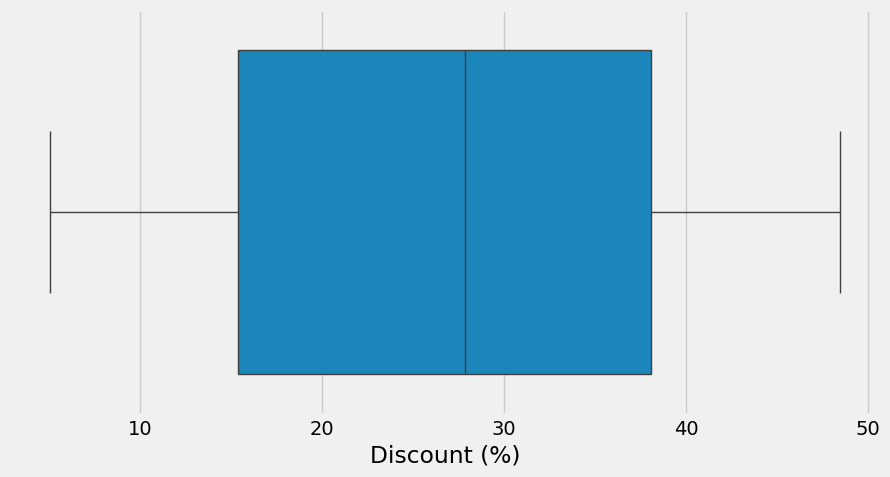

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x=df['Discount (%)'])
plt.show()

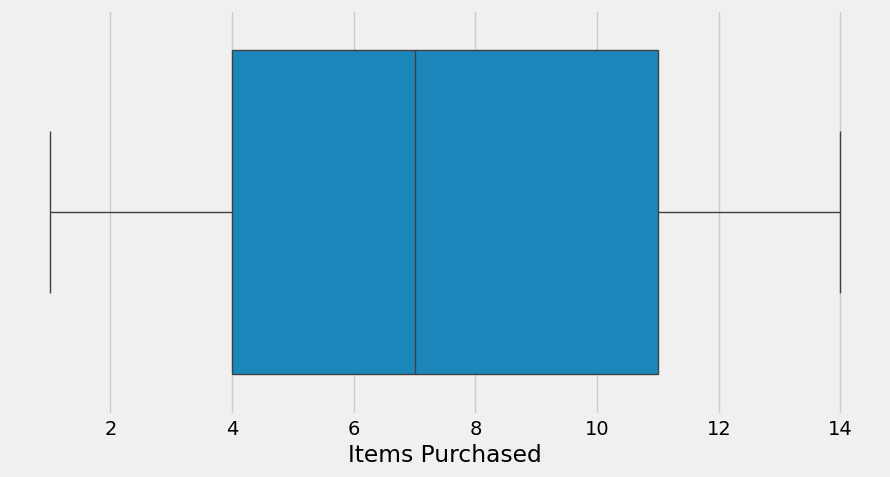

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x=df['Items Purchased'])
plt.show()

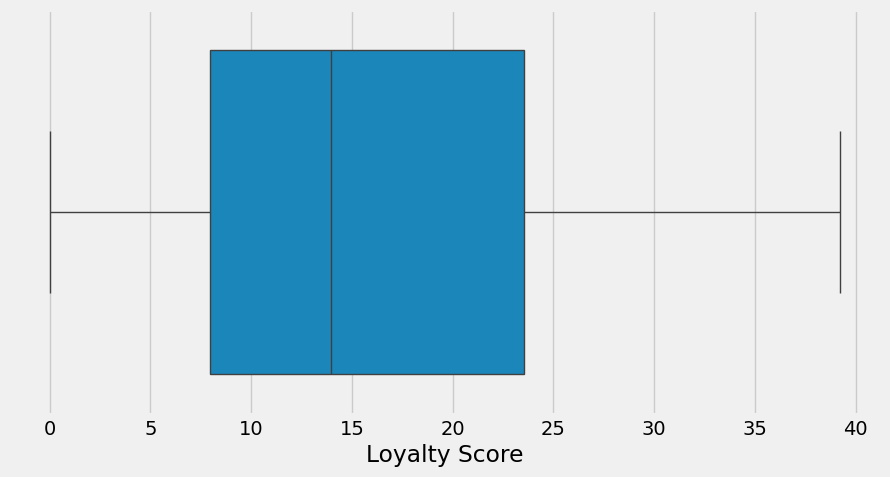

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x=df['Loyalty Score'])
plt.show()

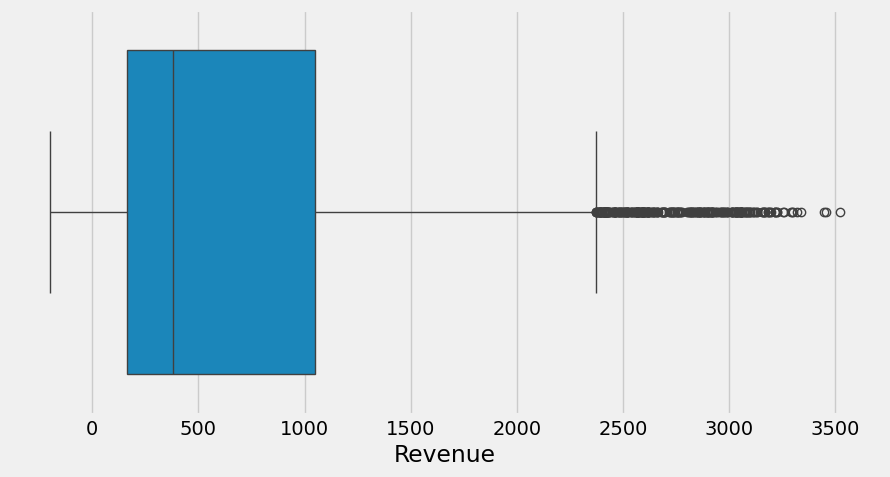

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x=df['Revenue'])
plt.show()

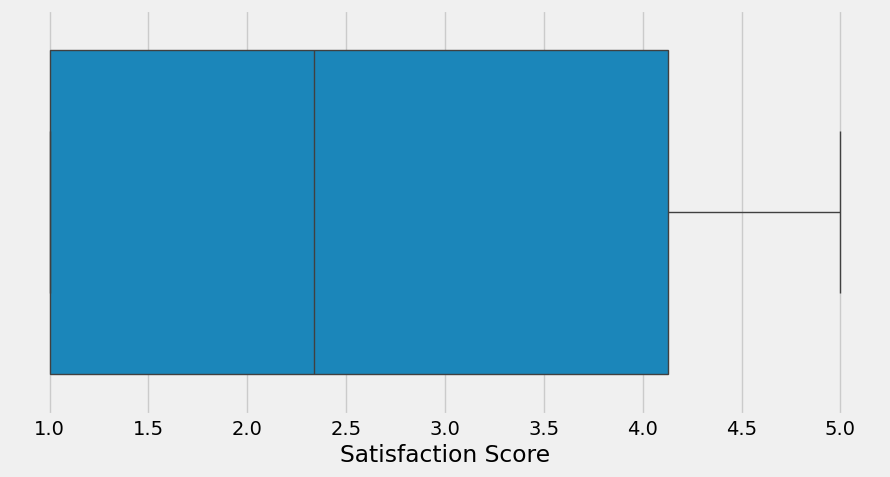

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x=df['Satisfaction Score'])
plt.show()

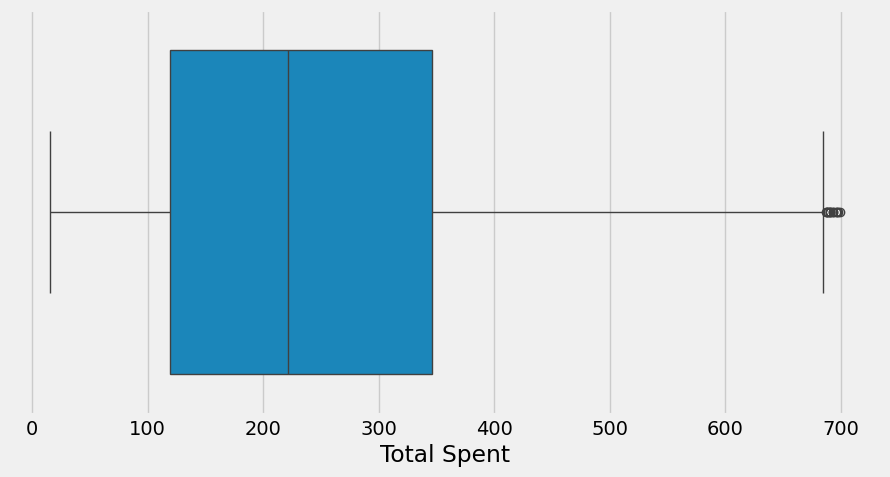

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x=df['Total Spent'])
plt.show()

In [23]:
cat_df = df.select_dtypes(include=['object'])

for col in cat_df.columns:
    print(f'\n{cat_df[col].value_counts()}')


Gender
Male      2447
Female    2372
Other      181
Name: count, dtype: int64

Region
South    1310
West     1281
East     1208
North    1201
Name: count, dtype: int64

Product Category
Accessories    1015
Laptop         1013
Tablet          997
Television      991
Mobile          984
Name: count, dtype: int64

Payment Method
Net Banking    1039
Cash           1016
Credit Card    1011
Debit Card      980
UPI             954
Name: count, dtype: int64

Preferred Visit Time
Morning      1677
Evening      1662
Afternoon    1661
Name: count, dtype: int64


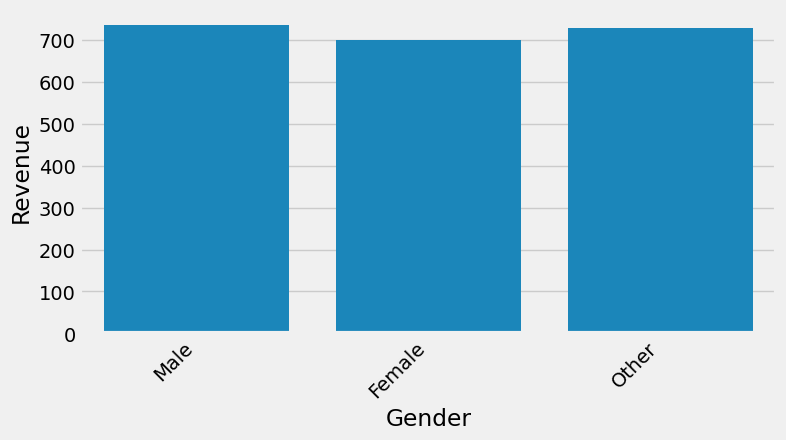

In [24]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Gender'],y=df['Revenue'],ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

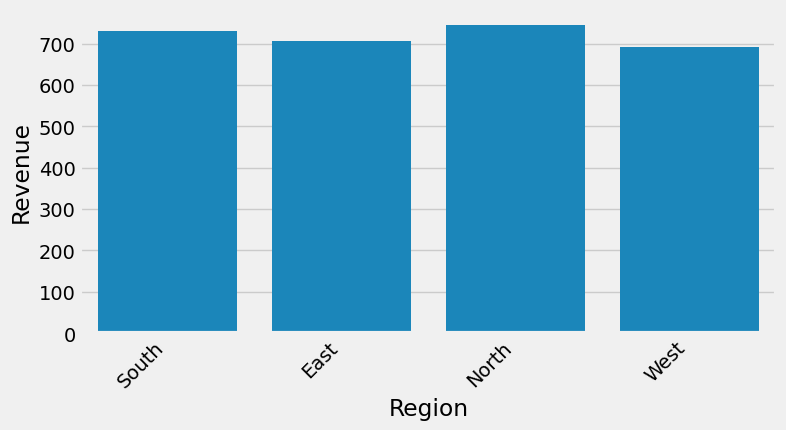

In [25]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Region'],y=df['Revenue'], ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

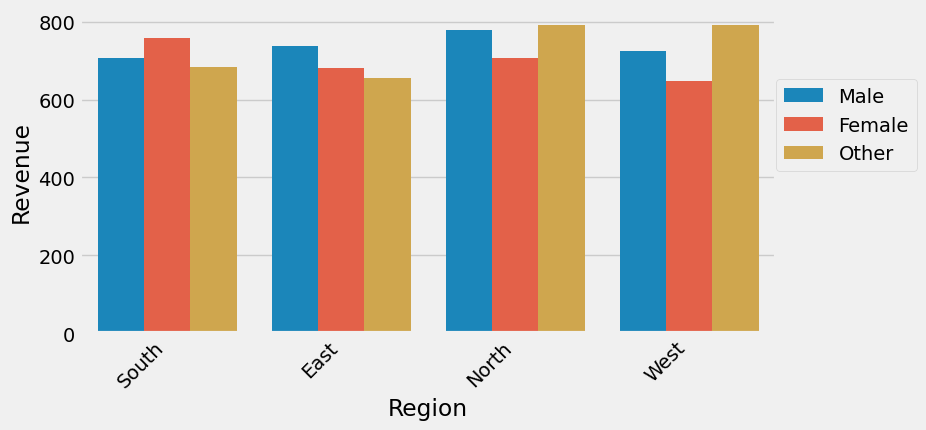

In [26]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Region'],y=df['Revenue'],hue=df['Gender'], ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(loc=[1,0.5])
plt.show()

In [27]:
from statsmodels.formula.api import ols 

reg_gen_model = ols('Revenue ~ Region + Gender',data = df).fit()
anova_reg_gen  = sm.stats.anova_lm(reg_gen_model,type=2)

reg_gen_model2 = ols('Revenue ~ Region * Gender',data = df).fit()
anova_reg_gen2  = sm.stats.anova_lm(reg_gen_model2,type=2)

print('Without interactions : \n',anova_reg_gen)
print('\n')
print('With interactions : \n',anova_reg_gen2)

Without interactions : 
               df        sum_sq        mean_sq         F    PR(>F)
Region       3.0  2.199529e+06  733176.397946  1.215411  0.302404
Gender       2.0  1.656677e+06  828338.716076  1.373165  0.253400
Residual  4994.0  3.012547e+09  603233.321109       NaN       NaN


With interactions : 
                    df        sum_sq        mean_sq         F    PR(>F)
Region            3.0  2.199529e+06  733176.397946  1.215669  0.302309
Gender            2.0  1.656677e+06  828338.716076  1.373456  0.253326
Region:Gender     6.0  4.257261e+06  709543.515101  1.176483  0.315632
Residual       4988.0  3.008290e+09  603105.441966       NaN       NaN


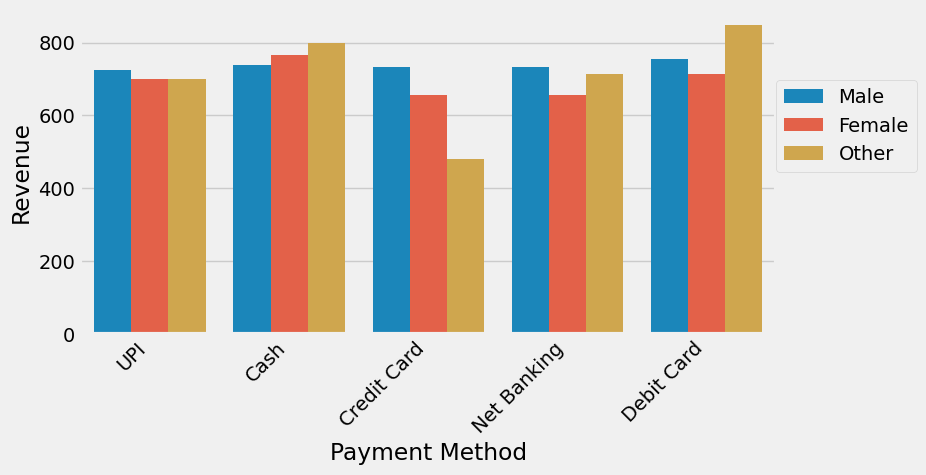

In [28]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Payment Method'],y=df['Revenue'],hue=df['Gender'], ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(loc=[1,0.5])
plt.show()

In [29]:
df = df.rename(columns={
    'Payment Method': 'Payment_Method'
})

pay_gen_model = ols('Revenue ~ Payment_Method + Gender',data = df).fit()
anova_pay_gen  = sm.stats.anova_lm(pay_gen_model,type=2)

pay_gen_model2 = ols('Revenue ~ Payment_Method + Gender + Payment_Method * Gender',data = df).fit()
anova_pay_gen2  = sm.stats.anova_lm(pay_gen_model2,type=2)

print('Without interactions : \n',anova_pay_gen)
print('\n')
print('With interactions : \n',anova_pay_gen2)


Without interactions : 
                     df        sum_sq        mean_sq         F    PR(>F)
Payment_Method     4.0  3.254541e+06  813635.156238  1.349015  0.249185
Gender             2.0  1.707768e+06  853883.798262  1.415748  0.242841
Residual        4993.0  3.011441e+09  603132.606453       NaN       NaN


With interactions : 
                            df        sum_sq        mean_sq         F    PR(>F)
Payment_Method            4.0  3.254541e+06  813635.156238  1.348448  0.249391
Gender                    2.0  1.707768e+06  853883.798262  1.415153  0.242986
Payment_Method:Gender     8.0  3.560633e+06  445079.170478  0.737636  0.658304
Residual               4985.0  3.007880e+09  603386.252890       NaN       NaN


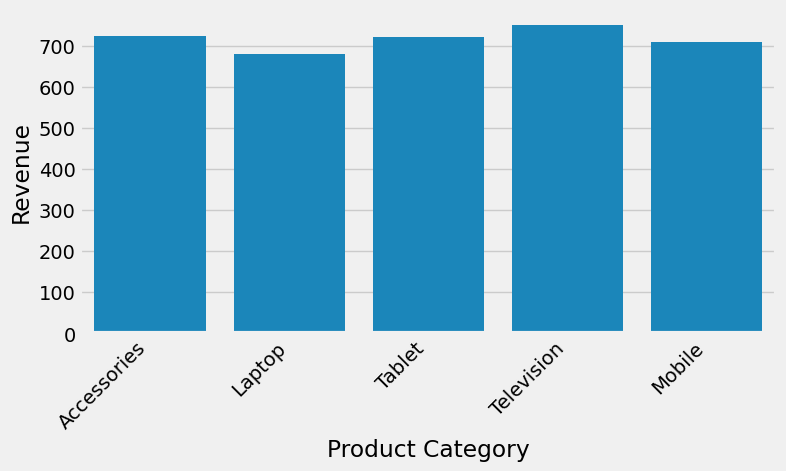

In [30]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Product Category'],y=df['Revenue'], ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

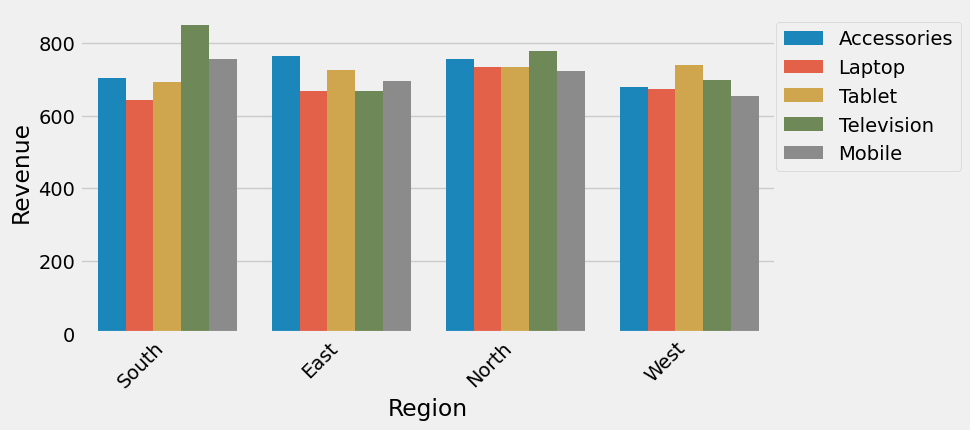

In [31]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Region'],y=df['Revenue'],hue=df['Product Category'], ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(loc=[1,0.5])
plt.show()

In [32]:
df = df.rename(columns={
    'Product Category': 'Product_Category'
})

reg_prod_model = ols('Revenue ~ Region + Product_Category',data = df).fit()
anova_reg_prod  = sm.stats.anova_lm(reg_prod_model,type=2)

reg_prod_model2 = ols('Revenue ~ Region + Product_Category + Product_Category * Region',data = df).fit()
anova_reg_prod2  = sm.stats.anova_lm(reg_prod_model2,type=2)

print('Without interactions : \n',anova_reg_prod)
print('\n')
print('With interactions : \n',anova_reg_prod2)

Without interactions : 
                       df        sum_sq        mean_sq         F    PR(>F)
Region               3.0  2.199529e+06  733176.397946  1.215356  0.302425
Product_Category     4.0  2.726466e+06  681616.500432  1.129887  0.340370
Residual          4992.0  3.011477e+09  603260.700530       NaN       NaN


With interactions : 
                              df        sum_sq        mean_sq         F  \
Region                      3.0  2.199529e+06  733176.397946  1.215217   
Product_Category            4.0  2.726466e+06  681616.500432  1.129759   
Product_Category:Region    12.0  6.897156e+06  574763.010856  0.952652   
Residual                 4980.0  3.004580e+09  603329.369662       NaN   

                           PR(>F)  
Region                   0.302476  
Product_Category         0.340431  
Product_Category:Region  0.492455  
Residual                      NaN  


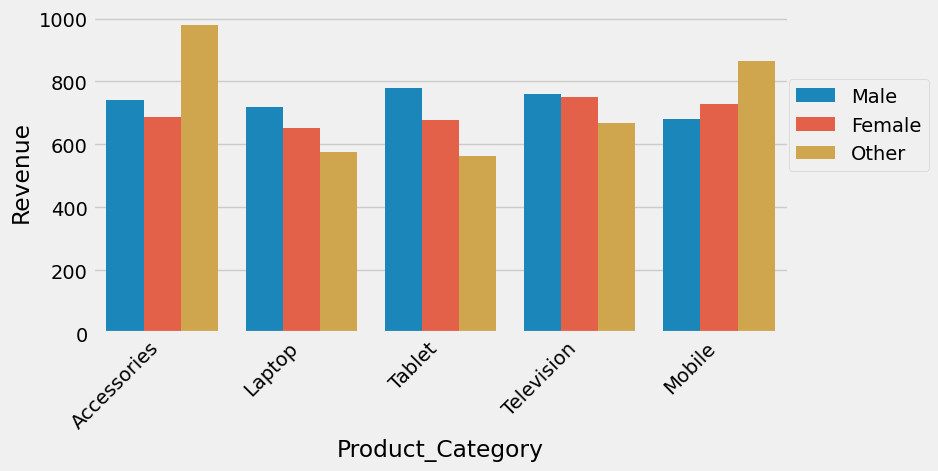

In [33]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Product_Category'],y=df['Revenue'],hue=df['Gender'], ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(loc=[1,0.5])
plt.show()

In [34]:
prod_gen_model = ols('Revenue ~ Product_Category + Gender',data = df).fit()
anova_prod_gen  = sm.stats.anova_lm(prod_gen_model,type=2)

reg_prod_model2 = ols('Revenue ~ Product_Category + Gender + Product_Category * Gender',data = df).fit()
anova_prod_gen2  = sm.stats.anova_lm(reg_prod_model2,type=2)

print('Without interactions : \n',anova_prod_gen)
print('\n')
print('With interactions : \n',anova_prod_gen2)


Without interactions : 
                       df        sum_sq        mean_sq         F    PR(>F)
Product_Category     4.0  2.750210e+06  687552.584132  1.139766  0.335738
Gender               2.0  1.674099e+06  837049.425391  1.387589  0.249773
Residual          4993.0  3.011979e+09  603240.357111       NaN       NaN


With interactions : 
                              df        sum_sq       mean_sq         F  \
Product_Category            4.0  2.750210e+06  6.875526e+05  1.141021   
Gender                      2.0  1.674099e+06  8.370494e+05  1.389117   
Product_Category:Gender     8.0  8.135553e+06  1.016944e+06  1.687660   
Residual                 4985.0  3.003844e+09  6.025764e+05       NaN   

                           PR(>F)  
Product_Category         0.335153  
Gender                   0.249392  
Product_Category:Gender  0.096031  
Residual                      NaN  


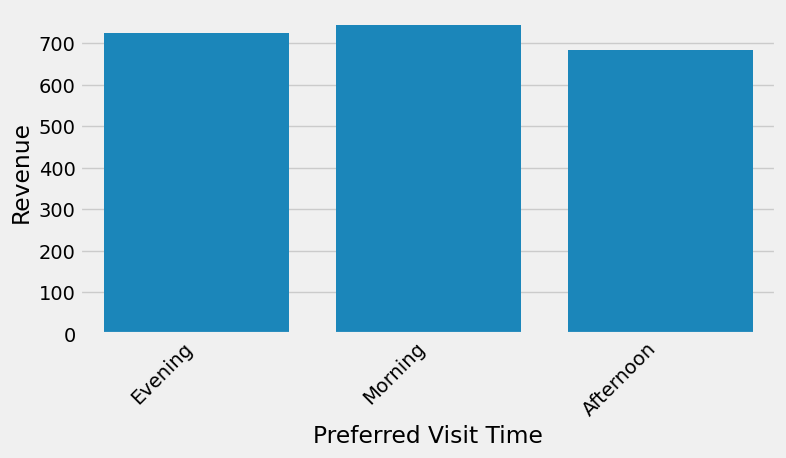

In [35]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Preferred Visit Time'],y=df['Revenue'], ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

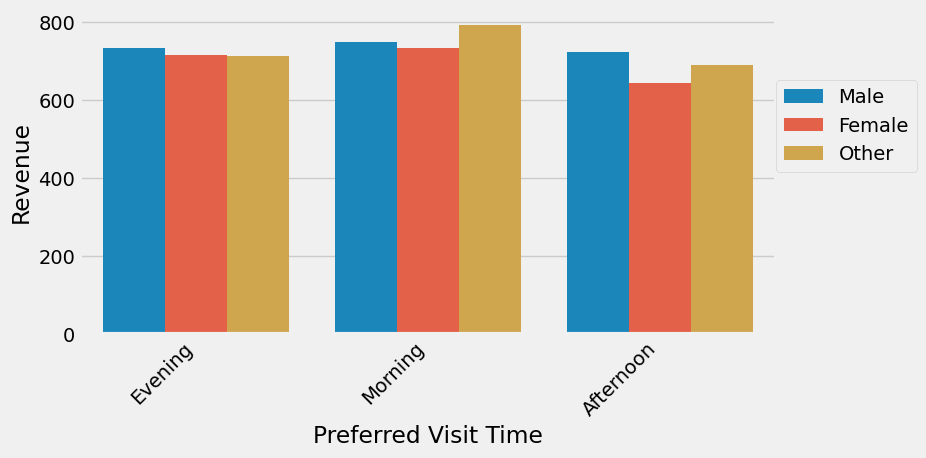

In [36]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Preferred Visit Time'],y=df['Revenue'],hue=df['Gender'], ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(loc = [1,0.5])
plt.show()

In [37]:
df = df.rename(columns={
    'Preferred Visit Time': 'Preferred_Visit_Time'
})

time_gen_model = ols('Revenue ~ Preferred_Visit_Time + Gender',data = df).fit()
anova_time_gen  = sm.stats.anova_lm(time_gen_model,type=2)

time_gen_model2 = ols('Revenue ~ Preferred_Visit_Time + Gender + Preferred_Visit_Time * Gender',data = df).fit()
anova_time_gen2  = sm.stats.anova_lm(time_gen_model2,type=2)

print('Without interactions : \n',anova_time_gen)
print('\n')
print('With interactions : \n',anova_time_gen2)

Without interactions : 
                           df        sum_sq       mean_sq         F    PR(>F)
Preferred_Visit_Time     2.0  3.099640e+06  1.549820e+06  2.570491  0.076599
Gender                   2.0  1.681140e+06  8.405699e+05  1.394148  0.248141
Residual              4995.0  3.011623e+09  6.029275e+05       NaN       NaN


With interactions : 
                                  df        sum_sq       mean_sq         F  \
Preferred_Visit_Time            2.0  3.099640e+06  1.549820e+06  2.569445   
Gender                          2.0  1.681140e+06  8.405699e+05  1.393580   
Preferred_Visit_Time:Gender     4.0  1.186700e+06  2.966749e+05  0.491857   
Residual                     4991.0  3.010436e+09  6.031729e+05       NaN   

                               PR(>F)  
Preferred_Visit_Time         0.076679  
Gender                       0.248282  
Preferred_Visit_Time:Gender  0.741749  
Residual                          NaN  


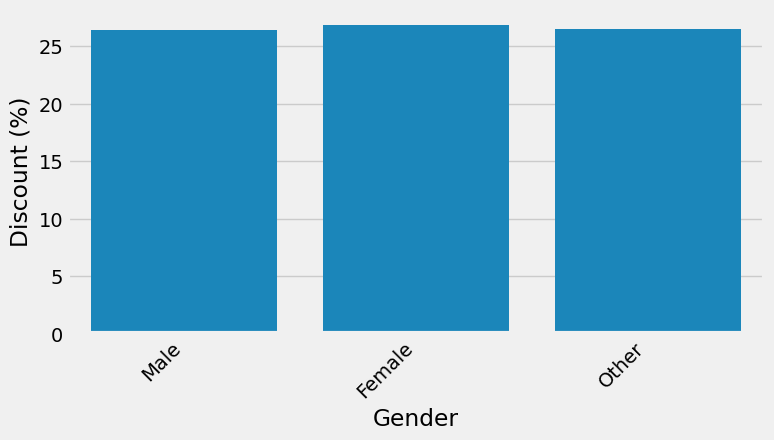

In [38]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Gender'],y=df['Discount (%)'], ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

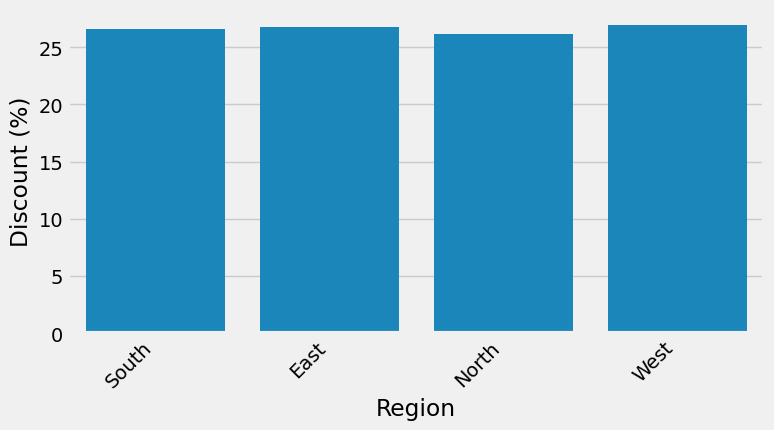

In [39]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Region'],y=df['Discount (%)'], ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

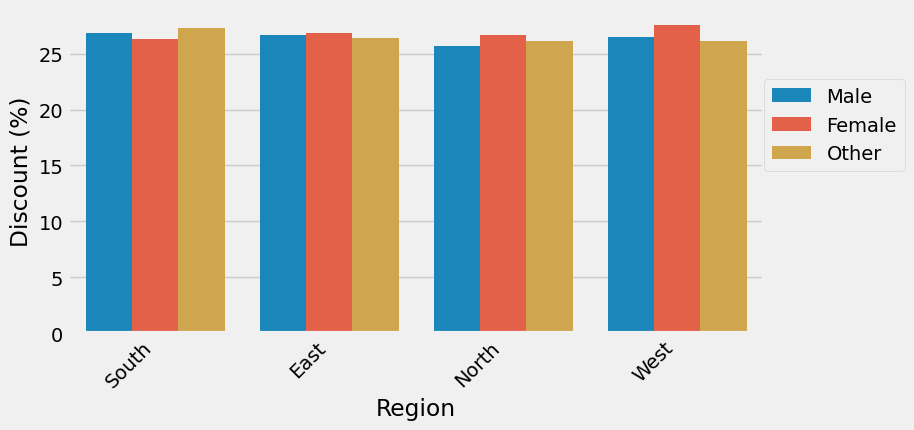

In [40]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Region'],y=df['Discount (%)'],hue=df['Gender'],ci=None)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(loc=[1,0.5])
plt.show()

In [41]:
df = df.rename(columns={
    'Discount (%)': 'Discount'
})

dis_reg_gen_model = ols('Discount ~ Region + Gender',data = df).fit()
anova_dis_reg_gen  = sm.stats.anova_lm(dis_reg_gen_model,type=2)

dis_reg_gen_model2 = ols('Discount ~ Region * Gender',data = df).fit()
anova_dis_reg_gen2  = sm.stats.anova_lm(dis_reg_gen_model2,type=2)

print('Without interactions : \n',anova_dis_reg_gen)
print('\n')
print('With interactions : \n',anova_dis_reg_gen2)

Without interactions : 
               df         sum_sq     mean_sq         F    PR(>F)
Region       3.0     442.175646  147.391882  0.798263  0.494668
Gender       2.0     272.482152  136.241076  0.737871  0.478183
Residual  4994.0  922096.184359  184.640806       NaN       NaN


With interactions : 
                    df         sum_sq     mean_sq         F    PR(>F)
Region            3.0     442.175646  147.391882  0.797830  0.494910
Gender            2.0     272.482152  136.241076  0.737471  0.478374
Region:Gender     6.0     608.041501  101.340250  0.548553  0.771464
Residual       4988.0  921488.142858  184.741007       NaN       NaN


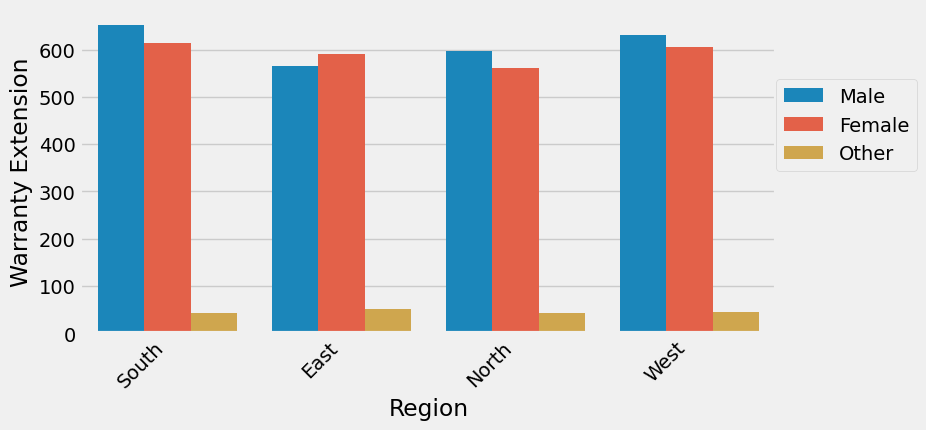

In [42]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,x=df['Region'],y=df['Warranty Extension'],hue = df['Gender'], ci=None,estimator='count')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(loc = [1,0.5])
plt.show()

In [43]:
from scipy.stats import chi2_contingency

war_gen = pd.crosstab(df['Warranty Extension'],df['Gender'])
war_gen

chi2_contingency(war_gen)

Chi2ContingencyResult(statistic=np.float64(2.934647618773202), pvalue=np.float64(0.2305416337096708), dof=2, expected_freq=array([[1849.2112, 1907.6812,  141.1076],
       [ 522.7888,  539.3188,   39.8924]]))

In [44]:
war_reg = pd.crosstab(df['Warranty Extension'],df['Region'])
war_reg
chi2_contingency(war_reg)

Chi2ContingencyResult(statistic=np.float64(1.003250594402208), pvalue=np.float64(0.8004654089100366), dof=3, expected_freq=array([[ 941.7568,  936.2996, 1021.276 ,  998.6676],
       [ 266.2432,  264.7004,  288.724 ,  282.3324]]))

In [45]:
war_prod = pd.crosstab(df['Warranty Extension'],df['Product_Category'])
war_prod
chi2_contingency(war_prod)

Chi2ContingencyResult(statistic=np.float64(3.2452637621253864), pvalue=np.float64(0.5176512465180626), dof=4, expected_freq=array([[791.294 , 789.7348, 767.1264, 777.2612, 772.5836],
       [223.706 , 223.2652, 216.8736, 219.7388, 218.4164]]))

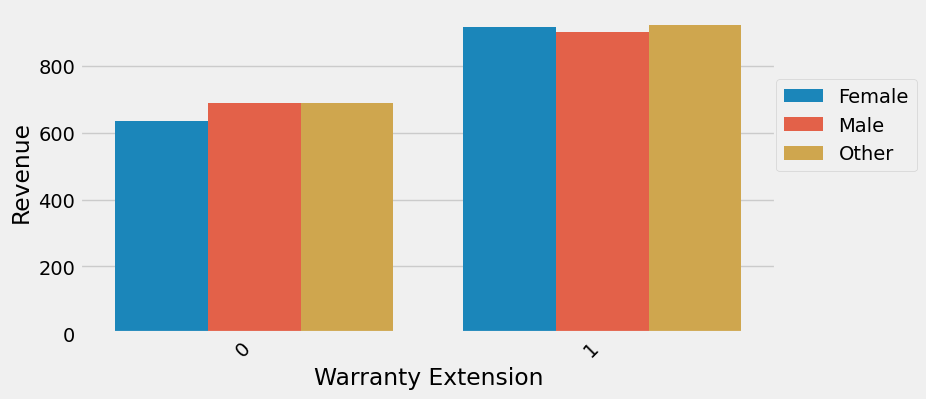

In [46]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,y=df['Revenue'],x=df['Warranty Extension'],hue=df['Gender'],ci=None,estimator='mean')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(loc = [1,0.5])
plt.show()

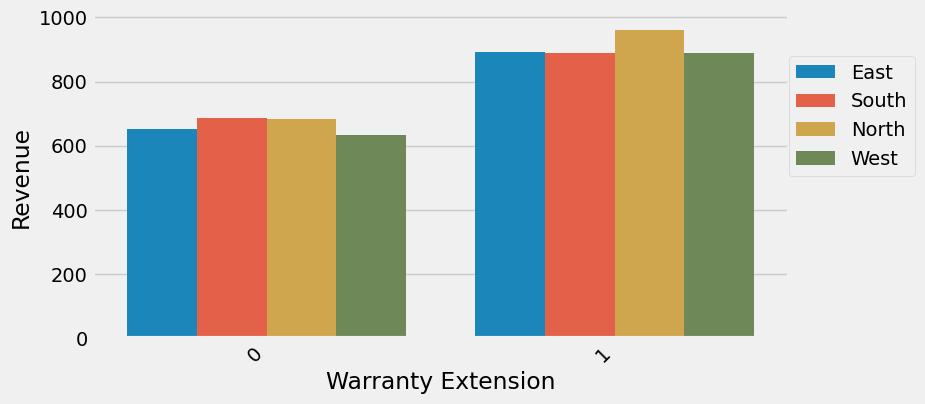

In [47]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,y=df['Revenue'],x=df['Warranty Extension'],hue=df['Region'],ci=None,estimator='mean')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(loc = [1,0.5])
plt.show()

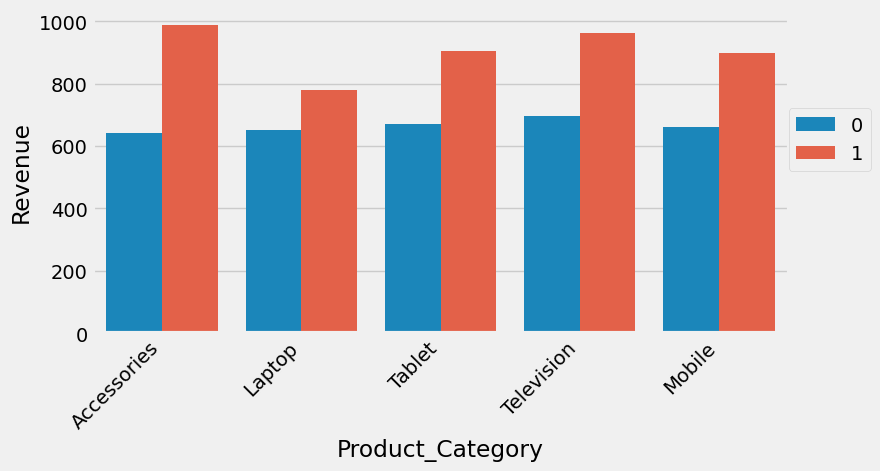

In [48]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,y=df['Revenue'],hue=df['Warranty Extension'],x=df['Product_Category'],ci=None,estimator='mean')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.legend(loc = [1,0.5])
plt.show()

In [49]:
df = df.rename(columns={
    'Warranty Extension': 'Warranty_Extension'
})

war_rev = ols('Revenue ~ Warranty_Extension',data=df).fit()
anova_war_rev=sm.stats.anova_lm(war_rev,type=2)

anova_war_rev

,df,sum_sq,mean_sq,F,PR(>F)
Warranty_Extension,1.0,5.100556e+07,5.100556e+07,85.966816,2.659581e-20
Residual,4998.0,2.965398e+09,5.933169e+05,NaN,NaN


In [50]:
mem_gen = pd.crosstab(df['Membership Status'],df['Gender'])
chi2_contingency(mem_gen)

Chi2ContingencyResult(statistic=np.float64(0.022557245047462784), pvalue=np.float64(0.9887847426914359), dof=2, expected_freq=array([[1640.4752, 1692.3452,  125.1796],
       [ 731.5248,  754.6548,   55.8204]]))

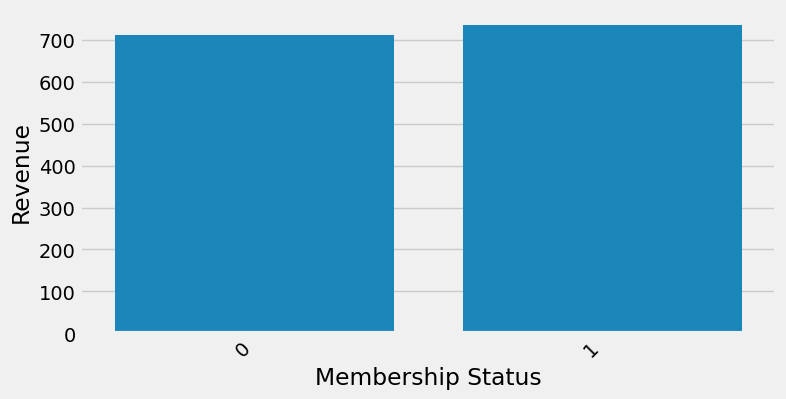

In [51]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df,y=df['Revenue'],x=df['Membership Status'],ci=None,estimator='mean')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
df = df.rename(columns={
    'Membership Status': 'Membership_Status'
})

mem_rev = ols('Revenue ~ Membership_Status',data=df).fit()
anova_mem_rev=sm.stats.anova_lm(mem_rev,type=2)

anova_mem_rev

,df,sum_sq,mean_sq,F,PR(>F)
Membership_Status,1.0,6.855163e+05,685516.252745,1.136118,0.286526
Residual,4998.0,3.015718e+09,603384.933171,NaN,NaN


In [53]:
cat_df.columns

Index(['Gender', 'Region', 'Product Category', 'Payment Method',
       'Preferred Visit Time'],
      dtype='object')

In [54]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df

,Items Purchased,Total Spent,Discount,Satisfaction Score,Warranty_Extension,Region,Product_Category,Payment_Method,Revenue,Loyalty Score,Membership_Status,Preferred_Visit_Time,Gender_Male,Gender_Other
0,1,29.226195,47.077380,1.000000,1,South,Accessories,UPI,149.252145,3.597133,1,Evening,True,False
1,10,420.142612,7.985739,3.760294,1,South,Accessories,Cash,1485.524222,25.764903,1,Evening,False,False
2,4,127.742817,37.225718,1.771240,1,East,Laptop,Credit Card,85.550131,7.022399,1,Morning,True,False
3,9,417.722683,8.227732,1.926831,0,East,Tablet,UPI,824.118724,7.635412,1,Afternoon,False,False
4,13,608.031366,5.000000,3.902927,0,South,Tablet,UPI,2463.590392,29.461119,0,Morning,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,39.583865,46.041614,1.000000,0,West,Television,Credit Card,-64.457793,9.136240,0,Morning,True,False
4996,5,172.486538,32.751346,1.000000,0,East,Accessories,Debit Card,138.772917,1.961965,0,Evening,True,False
4997,11,493.388104,5.000000,2.324783,0,North,Television,Net Banking,1010.219124,16.750489,0,Evening,True,False
4998,10,260.269589,23.973041,5.000000,1,West,Accessories,Debit Card,1114.585926,25.562475,1,Afternoon,False,False


In [55]:
df = pd.get_dummies(df, columns=['Region'], drop_first=True)
df

,Items Purchased,Total Spent,Discount,Satisfaction Score,Warranty_Extension,Product_Category,Payment_Method,Revenue,Loyalty Score,Membership_Status,Preferred_Visit_Time,Gender_Male,Gender_Other,Region_North,Region_South,Region_West
0,1,29.226195,47.077380,1.000000,1,Accessories,UPI,149.252145,3.597133,1,Evening,True,False,False,True,False
1,10,420.142612,7.985739,3.760294,1,Accessories,Cash,1485.524222,25.764903,1,Evening,False,False,False,True,False
2,4,127.742817,37.225718,1.771240,1,Laptop,Credit Card,85.550131,7.022399,1,Morning,True,False,False,False,False
3,9,417.722683,8.227732,1.926831,0,Tablet,UPI,824.118724,7.635412,1,Afternoon,False,False,False,False,False
4,13,608.031366,5.000000,3.902927,0,Tablet,UPI,2463.590392,29.461119,0,Morning,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,39.583865,46.041614,1.000000,0,Television,Credit Card,-64.457793,9.136240,0,Morning,True,False,False,False,True
4996,5,172.486538,32.751346,1.000000,0,Accessories,Debit Card,138.772917,1.961965,0,Evening,True,False,False,False,False
4997,11,493.388104,5.000000,2.324783,0,Television,Net Banking,1010.219124,16.750489,0,Evening,True,False,True,False,False
4998,10,260.269589,23.973041,5.000000,1,Accessories,Debit Card,1114.585926,25.562475,1,Afternoon,False,False,False,False,True


In [56]:
df = pd.get_dummies(df, columns=['Product_Category'], drop_first=True)
df

,Items Purchased,Total Spent,Discount,Satisfaction Score,Warranty_Extension,Payment_Method,Revenue,Loyalty Score,Membership_Status,Preferred_Visit_Time,Gender_Male,Gender_Other,Region_North,Region_South,Region_West,Product_Category_Laptop,Product_Category_Mobile,Product_Category_Tablet,Product_Category_Television
0,1,29.226195,47.077380,1.000000,1,UPI,149.252145,3.597133,1,Evening,True,False,False,True,False,False,False,False,False
1,10,420.142612,7.985739,3.760294,1,Cash,1485.524222,25.764903,1,Evening,False,False,False,True,False,False,False,False,False
2,4,127.742817,37.225718,1.771240,1,Credit Card,85.550131,7.022399,1,Morning,True,False,False,False,False,True,False,False,False
3,9,417.722683,8.227732,1.926831,0,UPI,824.118724,7.635412,1,Afternoon,False,False,False,False,False,False,False,True,False
4,13,608.031366,5.000000,3.902927,0,UPI,2463.590392,29.461119,0,Morning,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,39.583865,46.041614,1.000000,0,Credit Card,-64.457793,9.136240,0,Morning,True,False,False,False,True,False,False,False,True
4996,5,172.486538,32.751346,1.000000,0,Debit Card,138.772917,1.961965,0,Evening,True,False,False,False,False,False,False,False,False
4997,11,493.388104,5.000000,2.324783,0,Net Banking,1010.219124,16.750489,0,Evening,True,False,True,False,False,False,False,False,True
4998,10,260.269589,23.973041,5.000000,1,Debit Card,1114.585926,25.562475,1,Afternoon,False,False,False,False,True,False,False,False,False


In [57]:
df = pd.get_dummies(df, columns=['Payment_Method'], drop_first=True)
df

,Items Purchased,Total Spent,Discount,Satisfaction Score,Warranty_Extension,Revenue,Loyalty Score,Membership_Status,Preferred_Visit_Time,Gender_Male,...,Region_South,Region_West,Product_Category_Laptop,Product_Category_Mobile,Product_Category_Tablet,Product_Category_Television,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI
0,1,29.226195,47.077380,1.000000,1,149.252145,3.597133,1,Evening,True,...,True,False,False,False,False,False,False,False,False,True
1,10,420.142612,7.985739,3.760294,1,1485.524222,25.764903,1,Evening,False,...,True,False,False,False,False,False,False,False,False,False
2,4,127.742817,37.225718,1.771240,1,85.550131,7.022399,1,Morning,True,...,False,False,True,False,False,False,True,False,False,False
3,9,417.722683,8.227732,1.926831,0,824.118724,7.635412,1,Afternoon,False,...,False,False,False,False,True,False,False,False,False,True
4,13,608.031366,5.000000,3.902927,0,2463.590392,29.461119,0,Morning,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,39.583865,46.041614,1.000000,0,-64.457793,9.136240,0,Morning,True,...,False,True,False,False,False,True,True,False,False,False
4996,5,172.486538,32.751346,1.000000,0,138.772917,1.961965,0,Evening,True,...,False,False,False,False,False,False,False,True,False,False
4997,11,493.388104,5.000000,2.324783,0,1010.219124,16.750489,0,Evening,True,...,False,False,False,False,False,True,False,False,True,False
4998,10,260.269589,23.973041,5.000000,1,1114.585926,25.562475,1,Afternoon,False,...,False,True,False,False,False,False,False,True,False,False


In [58]:
df = pd.get_dummies(df, columns=['Preferred_Visit_Time'], drop_first=True)
df

,Items Purchased,Total Spent,Discount,Satisfaction Score,Warranty_Extension,Revenue,Loyalty Score,Membership_Status,Gender_Male,Gender_Other,...,Product_Category_Laptop,Product_Category_Mobile,Product_Category_Tablet,Product_Category_Television,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI,Preferred_Visit_Time_Evening,Preferred_Visit_Time_Morning
0,1,29.226195,47.077380,1.000000,1,149.252145,3.597133,1,True,False,...,False,False,False,False,False,False,False,True,True,False
1,10,420.142612,7.985739,3.760294,1,1485.524222,25.764903,1,False,False,...,False,False,False,False,False,False,False,False,True,False
2,4,127.742817,37.225718,1.771240,1,85.550131,7.022399,1,True,False,...,True,False,False,False,True,False,False,False,False,True
3,9,417.722683,8.227732,1.926831,0,824.118724,7.635412,1,False,False,...,False,False,True,False,False,False,False,True,False,False
4,13,608.031366,5.000000,3.902927,0,2463.590392,29.461119,0,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,39.583865,46.041614,1.000000,0,-64.457793,9.136240,0,True,False,...,False,False,False,True,True,False,False,False,False,True
4996,5,172.486538,32.751346,1.000000,0,138.772917,1.961965,0,True,False,...,False,False,False,False,False,True,False,False,True,False
4997,11,493.388104,5.000000,2.324783,0,1010.219124,16.750489,0,True,False,...,False,False,False,True,False,False,True,False,True,False
4998,10,260.269589,23.973041,5.000000,1,1114.585926,25.562475,1,False,False,...,False,False,False,False,False,True,False,False,False,False


In [59]:
X = df.drop(['Revenue','Discount','Loyalty Score'],axis=1).copy()
y = df['Revenue']
bool_cols = X.select_dtypes(include=['bool','boolean']).columns
X[bool_cols] = X[bool_cols].astype(int)
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     2154.
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        00:11:21   Log-Likelihood:                -34702.
No. Observations:                5000   AIC:                         6.945e+04
Df Residuals:                    4979   BIC:                         6.958e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -518.2729     15.971    -32.450      0.000    -549.584    -486.962
Items Purchased                -39.1230      1.616    -24.203      0.000     -42.292     -35.954
Total Spent                      4.0562      0.046     88.934      0.000       3.967       4.146
Satisfaction Score             203.2709      2.887     70.404      0.000     197.611     208.931
Warranty_Extension              36.4379      8.641      4.217      0.000      19.499      53.377
Membership_Status               10.4581      7.682      1.361      0.173      -4.601      25.518
Gender_Male                      5.9667      7.229      0.825      0.409      -8.206      20.139
Gender_Other                     8.4190     19.346      0.435      0.663     -29.508      46.346
Region_North                     9.7611     10.231      0.954      0.340     -10.296      29.819
Region_South                    17.2407     10.013      1.722      0.085      -2.389      36.871
Region_West                     -2.0993     10.062     -0.209      0.835     -21.825      17.627
Product_Category_Laptop        -28.5662     11.146     -2.563      0.010     -50.418      -6.715
Product_Category_Mobile        -16.5460     11.238     -1.472      0.141     -38.577       5.485
Product_Category_Tablet        -16.8177     11.188     -1.503      0.133     -38.751       5.115
Product_Category_Television     -2.5362     11.206     -0.226      0.821     -24.506      19.433
Payment_Method_Credit Card      -7.3112     11.147     -0.656      0.512     -29.165      14.543
Payment_Method_Debit Card        1.7825     11.238      0.159      0.874     -20.248      23.813
Payment_Method_Net Banking       2.1193     11.073      0.191      0.848     -19.588      23.827
Payment_Method_UPI              -4.4155     11.312     -0.390      0.696     -26.592      17.761
Preferred_Visit_Time_Evening    -6.6283      8.704     -0.762      0.446     -23.692      10.436
Preferred_Visit_Time_Morning    -0.9641      8.689     -0.111      0.912     -17.999      16.071
==============================================================================
Omnibus:                       30.273   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.705
Skew:                           0.027   Prob(JB):                     1.94e-05
Kurtosis:                       2.682   Cond. No.                     1.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# X must NOT contain string/categorical and must include constant
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)


                         feature        VIF
0                          const  20.323019
1                Items Purchased   3.354915
2                    Total Spent   3.978351
3             Satisfaction Score   1.561302
4             Warranty_Extension   1.022053
5              Membership_Status   1.002752
6                    Gender_Male   1.040470
7                   Gender_Other   1.040362
8                   Region_North   1.522037
9                   Region_South   1.544533
10                   Region_West   1.537118
11       Product_Category_Laptop   1.599114
12       Product_Category_Mobile   1.590506
13       Product_Category_Tablet   1.592002
14   Product_Category_Television   1.590067
15    Payment_Method_Credit Card   1.597094
16     Payment_Method_Debit Card   1.585485
17    Payment_Method_Net Banking   1.608018
18            Payment_Method_UPI   1.574010
19  Preferred_Visit_Time_Evening   1.339509
20  Preferred_Visit_Time_Morning   1.340908


In [61]:
df.head()

,Items Purchased,Total Spent,Discount,Satisfaction Score,Warranty_Extension,Revenue,Loyalty Score,Membership_Status,Gender_Male,Gender_Other,...,Product_Category_Laptop,Product_Category_Mobile,Product_Category_Tablet,Product_Category_Television,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Net Banking,Payment_Method_UPI,Preferred_Visit_Time_Evening,Preferred_Visit_Time_Morning
0,1,29.226195,47.077380,1.000000,1,149.252145,3.597133,1,True,False,...,False,False,False,False,False,False,False,True,True,False
1,10,420.142612,7.985739,3.760294,1,1485.524222,25.764903,1,False,False,...,False,False,False,False,False,False,False,False,True,False
2,4,127.742817,37.225718,1.771240,1,85.550131,7.022399,1,True,False,...,True,False,False,False,True,False,False,False,False,True
3,9,417.722683,8.227732,1.926831,0,824.118724,7.635412,1,False,False,...,False,False,True,False,False,False,False,True,False,False
4,13,608.031366,5.000000,3.902927,0,2463.590392,29.461119,0,False,False,...,False,False,True,False,False,False,False,True,False,True
